In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import gmaps
import matplotlib.pyplot as plt

# Google developer API key
from config import g_key

In [2]:
# File to Load 
traffic_file = "project_data.csv"

# Read Traffic File and Store into Pandas DataFrame
traffic_df = pd.read_csv(traffic_file)

traffic_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,9227453,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,PDO Minor,Hit Object,NaN,0,0,0,0,0,0
1,9227808,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,PDO Major,Hit Object,NaN,0,0,0,0,0,0


In [3]:
# File to Load 
speedlimit_file = "Legal_Speed_Limits.csv"

# Read Traffic File and Store into Pandas DataFrame
speedlimit_df = pd.read_csv(speedlimit_file)

# Rename "ROAD" column to "ROAD_NO" to have similar column names in both DataFrames
speedlimit_df=speedlimit_df.rename(columns={"ROAD":"ROAD_NO"})

speedlimit_df.head(2)

,OBJECTID,ROAD_NO,ROAD_NAME,COMMON_USAGE_NAME,START_SLK,END_SLK,CWY,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
0,47167919,2110042,Hacket Rd,Hacket Rd,0.0,1.15,Single,0.0,1.15,Local Road,2,South West,211,Harvey,50km/h applies in built up areas or 110km/h ou...,218243,0.010896
1,47167920,1071273,Gypsum Cove,Gypsum Cove,0.0,0.12,Single,0.0,0.12,Local Road,7,Metropolitan,107,Rockingham (C),50km/h applies in built up areas or 110km/h ou...,218228,0.001073


In [4]:
# Merge Traffic and SpeedLimit DataFrames 
merged_df = pd.merge(traffic_df, speedlimit_df, how="left", on="ROAD_NO")
merged_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME_x,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,...,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
0,9227453,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,PDO Minor,Hit Object,NaN,...,0.00,0.56,Local Road,6.0,Kimberley,1.0,Broome,50km/h applies in built up areas or 110km/h ou...,8196347.0,0.005025
1,9227808,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,PDO Major,Hit Object,NaN,...,5.72,6.23,Local Road,7.0,Metropolitan,102.0,Kalamunda,70km/h,16101734.0,0.004885


In [5]:
# Cleaning merged dataframe
merged_df=merged_df[["ROAD_NO","SPEED_LIMIT","LONGITUDE","LATITUDE","CRASH_DATE","CRASH_TIME","SEVERITY", \
    "TOTAL_BIKE_INVOLVED", "TOTAL_TRUCK_INVOLVED","TOTAL_HEAVY_TRUCK_INVOLVED","TOTAL_MOTOR_CYCLE_INVOLVED", \
        "TOTAL_OTHER_VEHICLES_INVOLVED", "TOTAL_PEDESTRIANS_INVOLVED"]]

clean_merged_df=merged_df.loc[merged_df["SPEED_LIMIT"]!="50km/h applies in built up areas or 110km/h outside built up areas"]

# Convert SPEED_LIMIT column from object to float
clean_merged_df["SPEED_LIMIT"]=clean_merged_df["SPEED_LIMIT"].str.replace("km/h"," ").astype(float) 
clean_merged_df.head(2)

C:\Users\Nassim\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ROAD_NO,SPEED_LIMIT,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
1,1020997,70.0,115.987176,-31.963001,1/1/16,0.0,PDO Major,0,0,0,0,0,0
2,1020997,70.0,115.987176,-31.963001,1/1/16,0.0,PDO Major,0,0,0,0,0,0


In [6]:
# Cleaning speedlimit dataframe
clean_speedlimit=speedlimit_df.loc[speedlimit_df["SPEED_LIMIT"]!= \
    "50km/h applies in built up areas or 110km/h outside built up areas"]

# Convert SPEED_LIMIT column from object to float
clean_speedlimit["SPEED_LIMIT"]=clean_speedlimit["SPEED_LIMIT"].str.replace("km/h"," ").astype(float)
clean_speedlimit.head(2)

C:\Users\Nassim\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OBJECTID,ROAD_NO,ROAD_NAME,COMMON_USAGE_NAME,START_SLK,END_SLK,CWY,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
52852,47220771,1080020,Falls Rd,Falls Rd,1.39,1.46,Single,1.39,1.46,Local Road,7,Metropolitan,108,Serpentine - Jarrahdale,10.0,214489,0.000745
52853,47220772,1240111,Hay St,Hay St Mall,2.18,2.50,Single,2.18,2.50,Local Road,7,Metropolitan,124,Perth (C),10.0,219218,0.003422


In [7]:
# Count number of accidents per speed limit
accident_count_per_speedlimit=clean_merged_df["SPEED_LIMIT"].value_counts()

# Remove speed limits below 50km/h
accident_count_per_speedlimit=accident_count_per_speedlimit.loc[accident_count_per_speedlimit.index>40]

print("Number of accidents:")
print(accident_count_per_speedlimit)

# Count number of roads per speed limit
road_count_per_speedlimit=(clean_speedlimit["SPEED_LIMIT"].value_counts())

# Remove speed limits below 50km/h
road_count_per_speedlimit=road_count_per_speedlimit.loc[road_count_per_speedlimit.index>40]
print("Number of roads:")
print(road_count_per_speedlimit)


Number of accidents:
60.0     681094
80.0     493251
110.0    433469
70.0     337430
100.0    253589
90.0     201370
50.0      47003
Name: SPEED_LIMIT, dtype: int64
Number of roads:
50.0     6107
60.0     2387
70.0     1490
110.0    1391
80.0     1291
90.0      505
100.0     409
Name: SPEED_LIMIT, dtype: int64


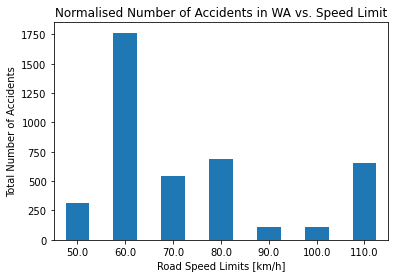

In [8]:
#Normalise accident data
total_roads=clean_speedlimit["SPEED_LIMIT"].sum()

normalised_accidents_per_speedlimit=accident_count_per_speedlimit*road_count_per_speedlimit/total_roads
normalised_accidents_per_speedlimit.plot(kind="bar", title="Normalised Number of Accidents in WA vs. Speed Limit",rot=0)
plt.ylabel("Total Number of Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

In [11]:
# Group Traffic DataFrame by "SEVERITY"
grouped_accidents_per_severity=clean_merged_df.groupby(["SEVERITY"])["SPEED_LIMIT"].value_counts()
grouped_accidents_per_severity

SEVERITY   SPEED_LIMIT
Fatal      110.0            7641
           80.0             5620
           60.0             5322
           90.0             2972
           70.0             2292
           50.0             1368
           100.0            1166
           40.0               97
           30.0                1
Hospital   60.0            34579
           110.0           33076
           80.0            30554
           70.0            17378
           90.0            13904
           100.0           11556
           50.0             4901
           40.0              684
           30.0               79
           10.0               10
           20.0                5
Medical    60.0            93743
           80.0            69747
           110.0           58192
           70.0            49234
           100.0           35897
           90.0            28251
           50.0             5688
           40.0             1680
           30.0              344
           10.0     

## Fatal Accident Analysis

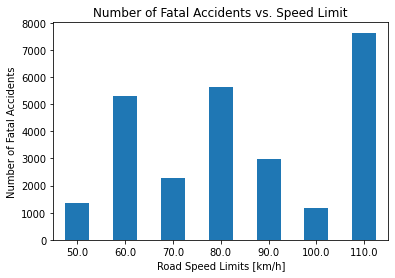

In [12]:
# Remove speed limits below 50km/h
fatal_accidents=grouped_accidents_per_severity["Fatal"].loc[grouped_accidents_per_severity["Fatal"].index>40].sort_index()

# Plot the Number of Fatal Accidents
fatal_accidents.plot(kind="bar", title="Number of Fatal Accidents vs. Speed Limit",rot=0)
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Hospital Accident Analysis

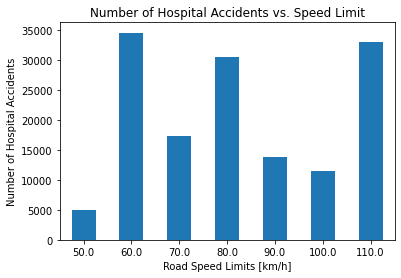

In [13]:
# Remove speed limits below 50km/h
hospital_accidents=grouped_accidents_per_severity["Hospital"].loc[grouped_accidents_per_severity["Hospital"].index>40].sort_index()

# Plot the Number of Fatal Accidents
hospital_accidents.plot(kind="bar", title="Number of Hospital Accidents vs. Speed Limit",rot=0)
plt.ylabel("Number of Hospital Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Medical Accident Analysis

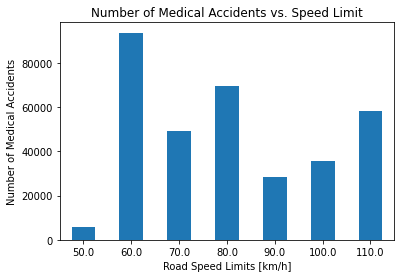

In [14]:
# Remove speed limits below 50km/h
medical_accidents=grouped_accidents_per_severity["Medical"].loc[grouped_accidents_per_severity["Medical"].index>40].sort_index()

# Plot the Number of Medical Accidents
medical_accidents.plot(kind="bar", title="Number of Medical Accidents vs. Speed Limit",rot=0)
plt.ylabel("Number of Medical Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

In [27]:
fatal_accident_df=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"]
locations=fatal_accident_df[["LATITUDE", "LONGITUDE"]]
locations

,LATITUDE,LONGITUDE
34,-33.863163,117.650152
152,-31.997880,117.328086
419,-31.800832,115.856913
487,-32.334363,115.960563
489,-20.926493,118.599260
...,...,...
135484,-31.704404,115.981100
135719,-30.026654,116.831264
135911,-31.913965,116.759051
135912,-31.731512,116.203346


In [43]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure(center=(-33,117), zoom_level=7)


# Assign the marker layer to a variable
symbols = gmaps.symbol_layer(locations, fill_color="red", fill_opacity=0.3,stroke_color="red", stroke_opacity=0.3)


# Add marker layer ontop of heat map
# fig.add_layer(heat_layer)
fig.add_layer(symbols)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
## TO-DO/EXPLORE >> This is just to explore the pattern/relationship between variable to see what is happening (the overall picture) after that we can hypothesis/test these relationships and weather they have a significant impact on accidents 

# How to round/Lat-lon to narrow down traffic zones (at the moment round to 1)

# Explore the relationships between the roads/suburb (lat/lon) and: 

    # Yearly pattern of accidents 

    # Pattern of accident by season/months 

    # Patterns of accident by day/night # use bin function to separate in 3 hour intervals -- > 

## ^^ Try and do groupby.severity

# How the accidents are in relation to: 
    
    # Year (time series) 

    # Season/months 

    # Day/night 

#Vehicle type (motorcycle/truck/car - other vehicle) - this can also link to cause potentially

    # Day/night 

    # Season/month
    
    # Year 

# Idea, if we can incorporate a colour map 